## [Pascal VOC Dataset](http://host.robots.ox.ac.uk/pascal/VOC/)
- [Visual Object Classes Challenge 2012 (VOC2012)](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/#data)에서 다운로드 가능

In [1]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"

--2023-01-03 02:12:55--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  20.9MB/s    in 96s     

2023-01-03 02:14:31 (19.9 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [2]:
!mkdir data

In [ ]:
!tar -xvf VOCtrainval_11-May-2012.tar -C ./data

In [ ]:
!cat ./data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

In [5]:
import xml.etree.ElementTree as ET

In [12]:
xml_file = "./data/VOCdevkit/VOC2012/Annotations/2007_000039.xml"

**Pasca VOC dataset의 특징**
- 이미지 1개당 1개의 Annotation 파일을 가짐

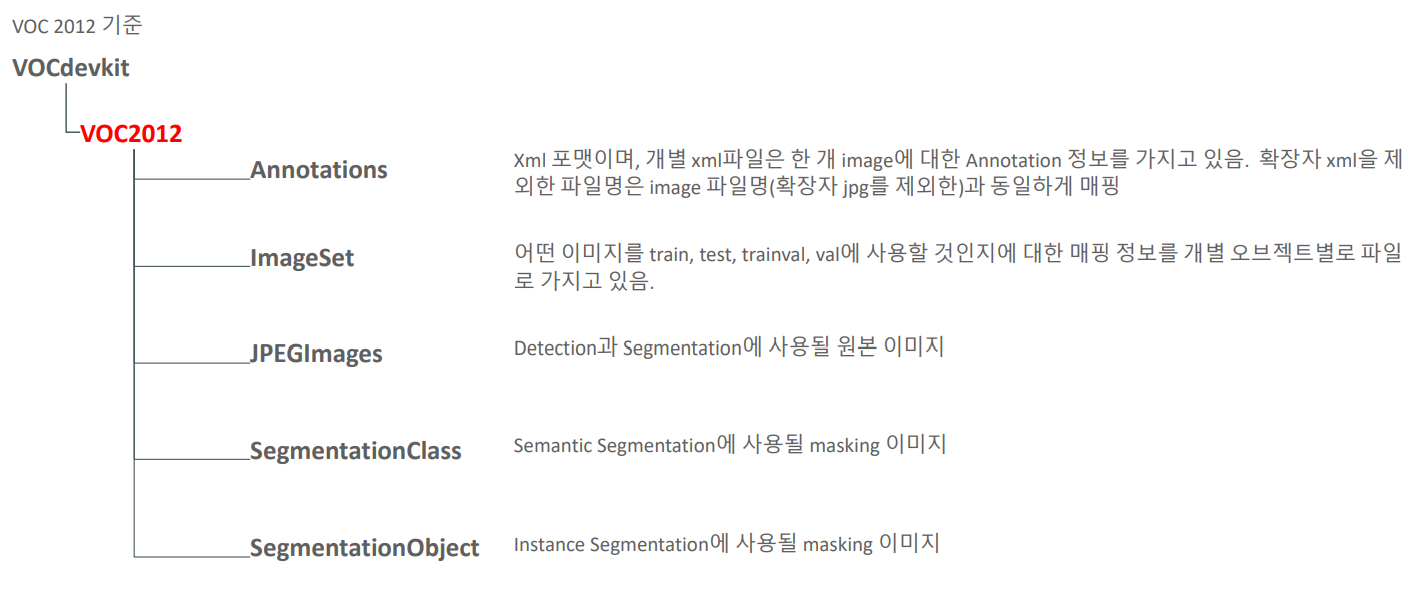

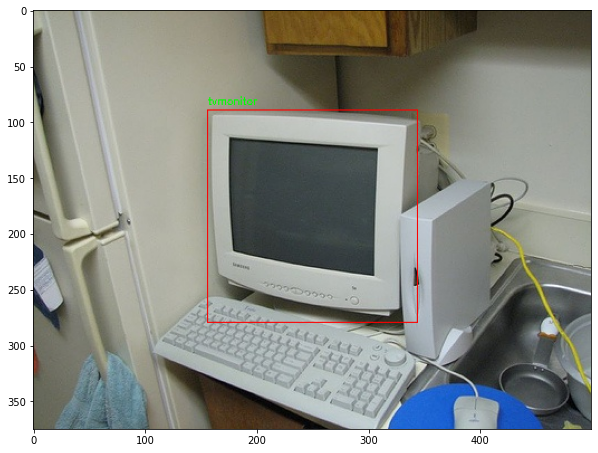

In [13]:
import os
import cv2
import matplotlib.pyplot as plt

img_dir = "./data/VOCdevkit/VOC2012/JPEGImages/"


tree = ET.parse(xml_file)
root = tree.getroot()

img_name = root.find('filename').text
img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)

img_full_path = os.path.join(img_dir, img_name)
img = cv2.imread(img_full_path)
dst = img.copy()


objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find('name').text

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## [MS-COCO DataSet](https://cocodataset.org/#home)
- [홈페이지의 Download 메뉴](https://cocodataset.org/#download)에서 다운로드 가능

In [ ]:
# !wget "http://images.cocodataset.org/zips/train2017.zip"

In [14]:
!wget "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

--2023-01-03 02:36:18--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.194.241, 3.5.17.112, 3.5.9.100, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.194.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  42.4MB/s    in 6.1s    

2023-01-03 02:36:25 (39.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [15]:
!mkdir ./data/mscoco

In [ ]:
# !unzip "train2017.zip" -d ./data/mscoco/

In [16]:
!unzip -q "annotations_trainval2017.zip" -d ./data/mscoco/

In [ ]:
!wget "http://images.cocodataset.org/zips/val2017.zip"

In [ ]:
!unzip "val2017.zip" -d ./data/mscoco/

**MS Coco Dataset의 특징**
- 모든 이미지들에 대해서 1개의 Annotation 파일을 가짐

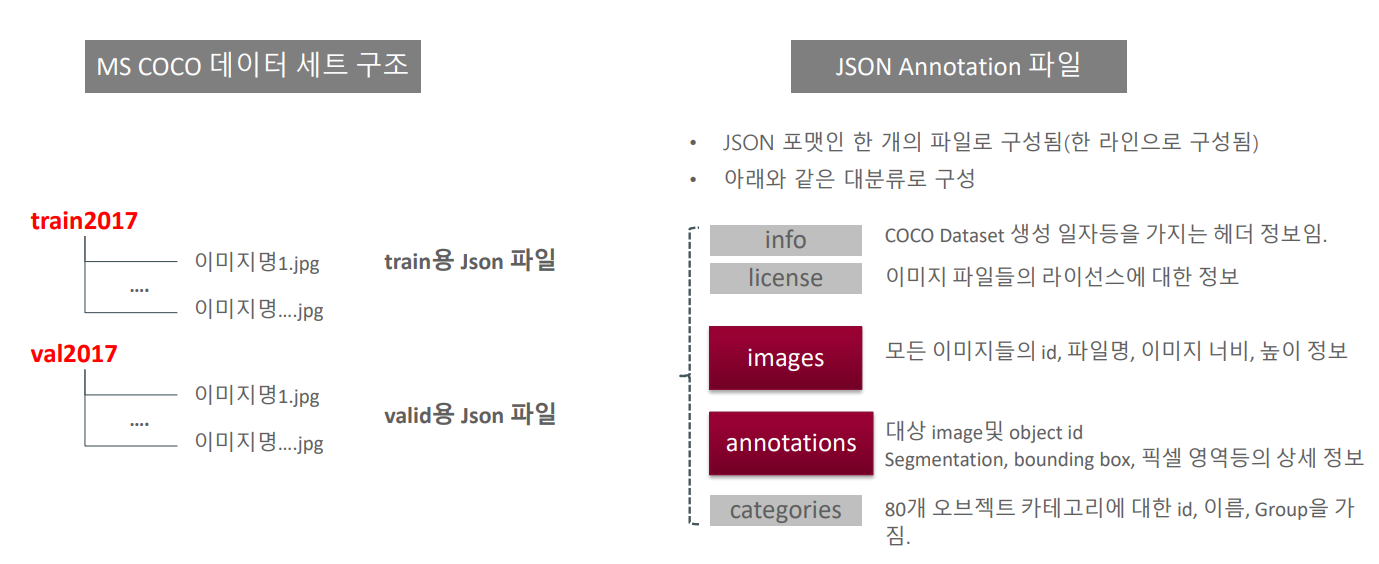

In [ ]:
# http://json.parser.online.fr/ (사이트에서 변환)
!sudo apt-get install jq

In [20]:
!jq . ./data/mscoco/annotations/instances_val2017.json > output.json

In [ ]:
!head -200 output.json

In [ ]:
!tail -800 output.json

In [23]:
!grep -n 'annotations' output.json

50054:  "annotations": [


In [ ]:
!head -50400 output.json

### pycocotools를 이용한 COCO 데이터 액세스
* pycocotools 사용 방법은 아래 github 참조 https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb 

In [ ]:
# /content/data/mscoco/annotations/instances_val2017.json

In [25]:
dataDir='./data/mscoco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

./data/mscoco/annotations/instances_val2017.json


**COCO API를 활용하기 위해 annotation 파일을 COCO 객체로 로드하기**

In [26]:
# annotation 파일을 COCO객체로 로드하면 다양한 COCO객체의 API들을 이용하여 COCO DATASET 활용 가능
from pycocotools.coco import COCO

coco=COCO(annFile)

loading annotations into memory...
Done (t=0.91s)
creating index...
index created!


**Cagory 정보 가져 오기**

In [27]:
# getCatIds()는 COCO Dataset의 category id를 리스트로 반환
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
# loadCats()는 category id 리스트를 입력받아 category들에 대한 세부 정보를 여러개의 딕셔너리를 개별 원소를 가지는 리스트로 반환
cats = coco.loadCats(coco.getCatIds())
cats

In [29]:
# COCO Category와 Super Category 출력
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor animal electronic food accessory sports vehicle kitchen indoor appliance furniture person


**지정된 이미지를 데이터 세트에서 로드하기**

In [30]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)
# coco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[1, 18, 41]
[549220, 324158, 279278]


In [52]:
#loadImgs()는 인자로 들어온 image id에 대한 메타 정보를 딕셔너리를 개별 원소로 가지는 리스트로 반환
img = coco.loadImgs(549220)
print(img)

[{'license': 2, 'file_name': '000000549220.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000549220.jpg', 'height': 640, 'width': 480, 'date_captured': '2013-11-18 11:01:23', 'flickr_url': 'http://farm4.staticflickr.com/3145/2419498650_fdfe34eb93_z.jpg', 'id': 549220}]


In [53]:
# 전체 리스트는 필요 없고 내부 딕셔너리만 필요하므로 [0]으로 내부 딕셔너리 추출 
print("\n내부 딕셔너리 파일 메타정보 추출")
img = coco.loadImgs(549220)[0]
print(img)


내부 딕셔너리 파일 메타정보 추출
{'license': 2, 'file_name': '000000549220.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000549220.jpg', 'height': 640, 'width': 480, 'date_captured': '2013-11-18 11:01:23', 'flickr_url': 'http://farm4.staticflickr.com/3145/2419498650_fdfe34eb93_z.jpg', 'id': 549220}


**COCO 이미지를 다운로드 후 시각화**

In [54]:
coco_url = img['coco_url']
print(coco_url)

http://images.cocodataset.org/val2017/000000549220.jpg


In [55]:
import urllib.request

def download_image(url, target_path):
  urllib.request.urlretrieve(url, target_path) 

download_image(img['coco_url'], './data/mscoco/' + img['file_name']) 

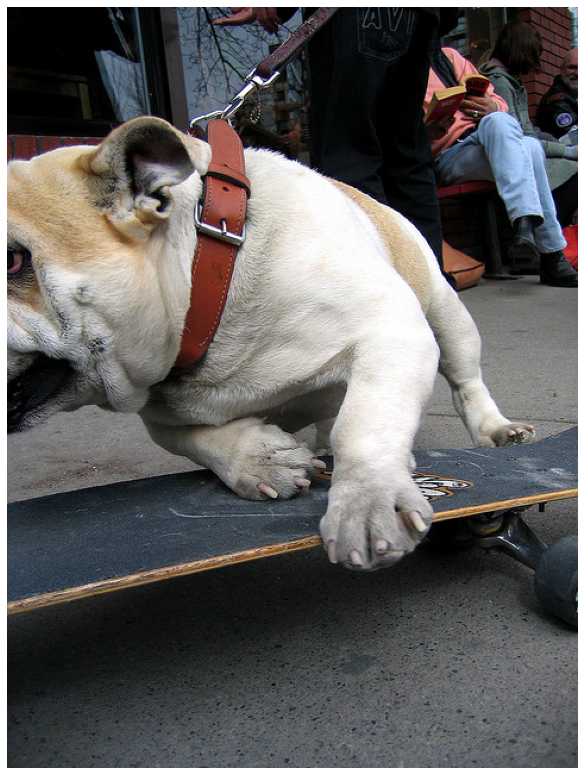

In [56]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

file_path = './data/mscoco/' + img['file_name']

image_array = cv2.imread(file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 14))
plt.axis('off')
plt.imshow(image_array)
plt.show()

### Instance Segmentation 시각화 (COCO API 활용)
* getAnnIds()로 특정 image에 해당하는 annotation id를 가져온 후에 이 id를 loadAnns()로 입력하여 해당 이미지의 모든 annotation 정보를 가져옴. 
* segmentation 정보는 polygon 형태로 되어 있음. 
* annotation 정보를 coco.showAnns(anns)에 입력하여 instance segmentation 시각화 수행.

In [57]:
img

{'license': 2,
 'file_name': '000000549220.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000549220.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-18 11:01:23',
 'flickr_url': 'http://farm4.staticflickr.com/3145/2419498650_fdfe34eb93_z.jpg',
 'id': 549220}

In [58]:
catIds

[1, 18, 41]

In [59]:
# 해당 image의 annotation을 가져오기 위해서 getAnnIds() 를 이용함. 인자로 image의 id(파일명이 아님)와 category id를 입력
# 하나의 image는 segmentation별로 여러개의 annotation을 가질 수 있음
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[6919, 189158, 200727, 639100, 1716649, 1737443]

In [60]:
# loadAnns()에 annotation id를 리스트로 입력하면 annotation 정보들을 반환함. 
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[0.0,
    126.71,
    18.1,
    126.71,
    73.7,
    111.19,
    109.9,
    86.63,
    149.98,
    100.85,
    208.16,
    109.9,
    272.81,
    137.05,
    321.94,
    161.62,
    354.26,
    181.01,
    377.54,
    228.85,
    402.1,
    279.27,
    405.98,
    311.6,
    421.49,
    340.04,
    451.23,
    359.43,
    435.72,
    372.36,
    391.76,
    373.66,
    382.71,
    359.43,
    376.24,
    334.87,
    367.19,
    311.6,
    360.73,
    312.89,
    351.68,
    350.38,
    346.51,
    382.71,
    360.73,
    415.03,
    362.02,
    440.89,
    349.09,
    458.99,
    321.94,
    479.68,
    283.15,
    480.97,
    263.76,
    468.04,
    262.46,
    446.06,
    259.88,
    420.2,
    263.76,
    402.1,
    271.52,
    387.88,
    270.22,
    358.14,
    276.69,
    341.33,
    285.74,
    320.65,
    241.78,
    356.85,
    261.17,
    376.24,
    254.71,
    402.1,
    252.12,
    415.03,
    227.56,
    417.62,
    201.7,
    417.62,
    179.72,
    4

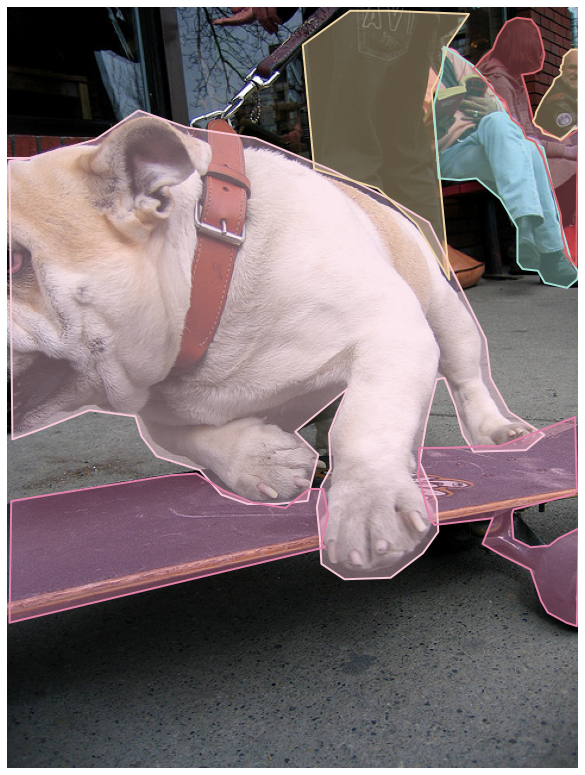

In [61]:
# showAnns( )는 annotation 정보들을 입력 받아서 Visualization 시켜줌. 단 먼저 matplotlib 객체로 원본 이미지가 먼저 로드되어 있어야 함. 
plt.figure(figsize=(12, 14))
plt.imshow(image_array)
plt.axis('off')

coco.showAnns(anns)

In [50]:
# coco api의 annToMask()를 이용하여 polygon을 mask 형태로 변환
mask = coco.annToMask(anns[2])

(-0.5, 499.5, 333.5, -0.5)

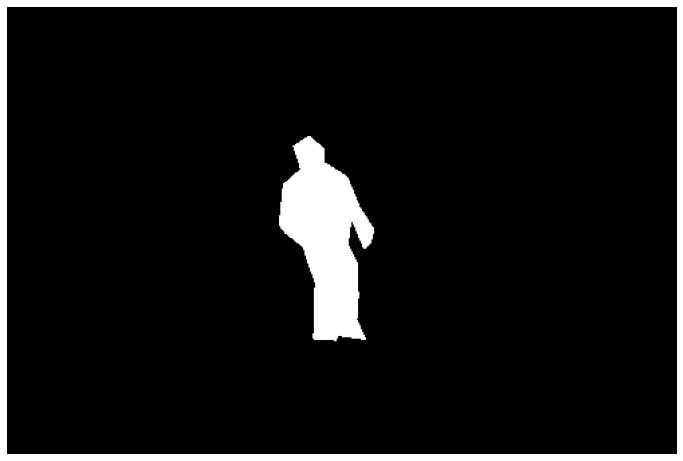

In [51]:
plt.figure(figsize=(12, 14))
plt.imshow(mask, cmap='gray')
plt.axis('off')